## Observations and Insights 

* There are **10 drug regimen** treatments in the study. The highest number of study is treated by Capomulin, the lowest number of study is treated by Propriva. This study is more focused toward **Capomulin regimen** compared to other treatments. 

* There are more male mice treated than female mice. However, the statistics shows **less than 1%** difference. Gender might not be the significant variable to the study.

* When we narrow down the drug regimen, final tumor volume treated by **Capomulin and Ramicane** tend to have lower number than the others. Ramicane seems to have lower final tumor volume. However, the number of mice treated by Ramicane is slightly less than Capomulin. In order to get more accurate study and conclusion, the treatment of both regimens might be continued with the same number of mice.

* Random select a Mouse ID can see the example of mouse treated by Capomulin.  In order to have a better understanding of the Capomulin treatment affect the tumor volume.  The samples line chart of 5 mice treated in the same regimen shows **the Capomulin could reduce the size of tumor volumn**.

* The correlation coefficient between the average weight and the final tumor volumn is **0.84**, that indicates **high positive correlation** between the weight and tumor volume. In addition, the r-squared **0.71** could infer that the final tumor volume could be predictable by using average weight of mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.columns)
print(study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [2]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice, counted by unique mouse ID
mouse_count = len(mouse_study_df["Mouse ID"].unique())
mouse_count_df = pd.DataFrame({"Total mouse": [mouse_count]})
mouse_count_df

,Total mouse
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# find the dumplicate Timepoint entery
duplicate_mice_ID = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# check for all duplicate Timepoint entry mouse ID
for mice in duplicate_mice_ID:
    duplicate_mice_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == mice,:]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# all the mouse ID that don't have duplicated Timepoint entry
for mice in duplicate_mice_ID:
    clean_mouse_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != mice,:]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
reduce_mouse_count = len(clean_mouse_df["Mouse ID"].unique())
clean_mouse_count_df = pd.DataFrame({"Total unique mouse": [reduce_mouse_count]})
clean_mouse_count_df

,Total unique mouse
0,248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
gp_drug = clean_mouse_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tv = gp_drug["Tumor Volume (mm3)"].mean()
median_tv = gp_drug["Tumor Volume (mm3)"].median()
var_tv = gp_drug["Tumor Volume (mm3)"].var()
stdev_tv = gp_drug["Tumor Volume (mm3)"].std()
sem_tv = gp_drug["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean tumor volume": mean_tv,
                                 "Median tumor volume": median_tv,
                                 "Variance tumor volume": var_tv,
                                 "Std. Dev. tumor volume": stdev_tv,
                                 "Std. Err. tumor volume": sem_tv})
summary_stats_df

,Mean tumor volume,Median tumor volume,Variance tumor volume,Std. Dev. tumor volume,Std. Err. tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
gp_drug.agg({"Tumor Volume (mm3)":["median", "mean", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.446266  52.320930  43.852013  6.622085  0.544332
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

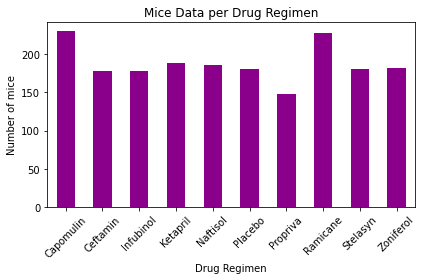

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
gp_drug_count = clean_mouse_df.groupby("Drug Regimen")["Mouse ID"].count()
gp_drug_count.head(10)

gp_drug_count.plot(kind = "bar", figsize = (6,4), color = "darkmagenta")
plt.xticks(rotation = 45)
plt.ylabel("Number of mice")
plt.title("Mice Data per Drug Regimen")
plt.tight_layout()
plt.savefig("Images/Drug regimen by pandas.png")
plt.show()

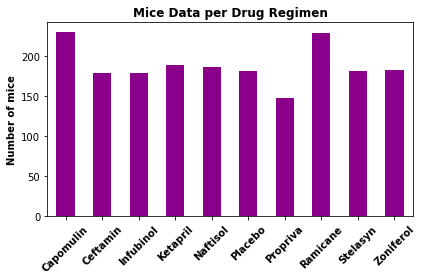

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# x-axis
drug_regimen = gp_drug_count.index
drug_regimen_x = np.arange(len(drug_regimen))
drug_regimen_x = gp_drug["Drug Regimen"]

# y_axis: gp_drug_count

plt.bar(drug_regimen, gp_drug_count, color = "darkmagenta", alpha = 1, width = 0.5, align = "center")
plt.xlim(-0.5, len(drug_regimen)-0.5)
plt.xticks(rotation = 45, fontweight = "bold")
plt.ylabel("Number of mice", fontweight = "bold")
plt.title("Mice Data per Drug Regimen", fontweight = "bold")
plt.tight_layout()
plt.savefig("Images/Drug regimen by pyplot.png")
plt.show()

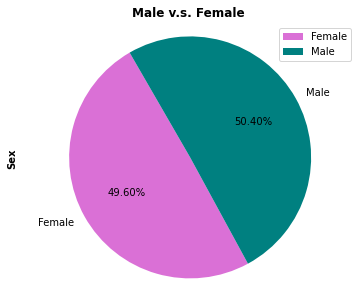

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gp_mouse_gender = clean_mouse_df.groupby(["Sex"]).nunique()
gp_gender_df = pd.DataFrame(gp_mouse_gender)

gender_pieplot = gp_gender_df.plot.pie(y = "Mouse ID",autopct = "%1.2f%%", figsize = (6,5), \
                                       startangle = 120, colors = ["orchid","teal"])

plt.axis("equal")
gender_pieplot.set_title(label = "Male v.s. Female", fontweight = "bold")
gender_pieplot.set_ylabel("Sex", fontweight = "bold")

plt.savefig("Images/Mice gender by pandas.png")
plt.show()

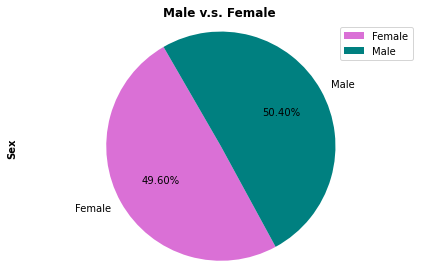

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = gp_mouse_gender.index

gp_gender_count = clean_mouse_df.groupby('Sex')['Mouse ID'].nunique()

colors = ["orchid","teal"]
plt.pie(gp_gender_count, labels = gp_mouse_gender.index, \
        colors = colors, autopct ="%1.2f%%", startangle = 120)

plt.axis("equal")
plt.legend(gp_mouse_gender.index,
          loc = "upper right")
plt.ylabel("Sex", fontweight = "bold")
plt.title("Male v.s. Female", fontweight = "bold")

plt.tight_layout()
plt.savefig("Images/Mice gender by pyplot.png")
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
sorted_data = clean_mouse_df.sort_values(["Mouse ID", "Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = sorted_data.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]
final_tumor_df = final_tumor_vol.reset_index()
final_tumor_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_ls = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tumor_vol_ls.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    mean = final_tumor_vol.mean()
    
    # Outliers
    t_vol_outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | \
                                        (final_tumor_vol > upper_bound)]

    # Print out the result

    print(f"{drug} Regimen: ")
    print(f"The average Tumor Volume (mm3) of {drug} is: {round(mean,2)} ")
    print(f"The Tumor Volume (mm3) below {round(lower_bound,2)} could be outliers.")
    print(f"The Tumor Volume (mm3) above {round(upper_bound,2)} could be outliers.")
    print(f"There's {t_vol_outliers.count()} outlier(s) found for {drug} regimen.")
    if t_vol_outliers.count() > 0:
        for i in t_vol_outliers.index:
            print(f"Outlier final tumor volume(mm3) is {round(t_vol_outliers[i], 2)}")
    print("-----------------------------------------------------")

Capomulin Regimen: 
The average Tumor Volume (mm3) of Capomulin is: 36.67 
The Tumor Volume (mm3) below 20.7 could be outliers.
The Tumor Volume (mm3) above 51.83 could be outliers.
There's 0 outlier(s) found for Capomulin regimen.
-----------------------------------------------------
Ramicane Regimen: 
The average Tumor Volume (mm3) of Ramicane is: 36.19 
The Tumor Volume (mm3) below 17.91 could be outliers.
The Tumor Volume (mm3) above 54.31 could be outliers.
There's 0 outlier(s) found for Ramicane regimen.
-----------------------------------------------------
Infubinol Regimen: 
The average Tumor Volume (mm3) of Infubinol is: 58.18 
The Tumor Volume (mm3) below 36.83 could be outliers.
The Tumor Volume (mm3) above 82.74 could be outliers.
There's 1 outlier(s) found for Infubinol regimen.
Outlier final tumor volume(mm3) is 36.32
-----------------------------------------------------
Ceftamin Regimen: 
The average Tumor Volume (mm3) of Ceftamin is: 57.75 
The Tumor Volume (mm3) below 

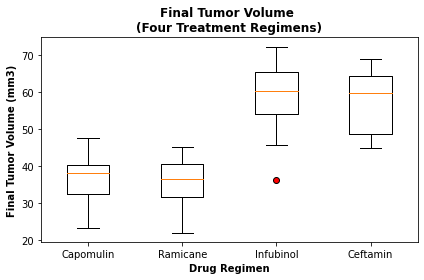

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_ls,labels = regimens, flierprops = {"markerfacecolor":"red"})

final_tumor_plot.set_title("Final Tumor Volume \n(Four Treatment Regimens)", fontweight = "bold")
final_tumor_plot.set_xlabel("Drug Regimen", fontweight = "bold")
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)", fontweight = "bold")
plt.tight_layout()

final_tumor_plot.figure.savefig("Images/Final tumor volume boxplot.png")
plt.show()

## Line and Scatter Plots

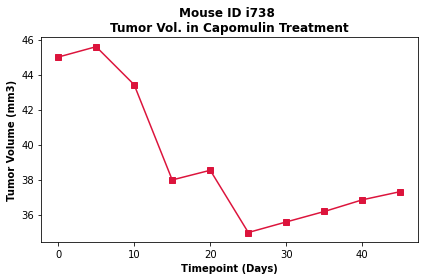

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
mouse_id_ls = Capomulin_df["Mouse ID"].unique()
# mouse_id_ls

# mouse id by random choice
mouse_id = np.random.choice(mouse_id_ls)
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse_id]

time_and_vol_plot = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], color = "crimson", marker = "s")
plt.title(f"Mouse ID {mouse_id} \nTumor Vol. in Capomulin Treatment", fontweight = "bold")
plt.xlabel("Timepoint (Days)", fontweight = "bold")
plt.ylabel("Tumor Volume (mm3)", fontweight = "bold")

plt.savefig("Images/Time vs Vol line plot.png")
plt.tight_layout()
plt.show()

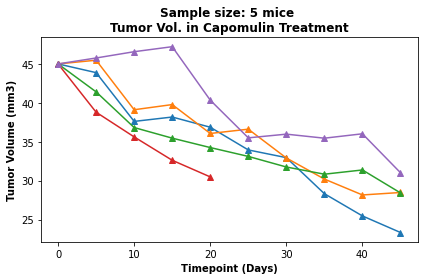

In [18]:
# for a more representative sample, sample size = 5

for mouse in mouse_id_ls[0:5]:
    mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse]
    # Generate a line plot
    plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], marker='^')
    
# time_and_vol_plot = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], color = "crimson", marker = "s")
plt.title(f"Sample size: 5 mice \nTumor Vol. in Capomulin Treatment", fontweight = "bold")
plt.xlabel("Timepoint (Days)", fontweight = "bold")
plt.ylabel("Tumor Volume (mm3)", fontweight = "bold")

plt.savefig("Images/Samples Time vs Vol line plot.png")
plt.tight_layout()
plt.show()

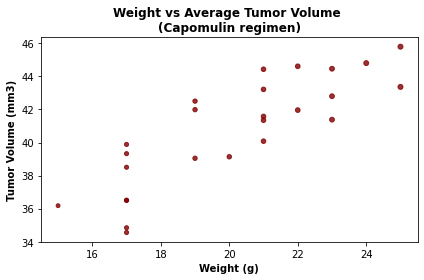

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mice = Capomulin_df.groupby("Mouse ID").mean()
Capomulin_mice_weight = Capomulin_mice["Weight (g)"]
Capomulin_mice_t_vol = Capomulin_mice["Tumor Volume (mm3)"]

plt.scatter(Capomulin_mice_weight, Capomulin_mice_t_vol, facecolors = "maroon", \
            s = Capomulin_mice_weight, alpha = 0.8)

plt.title(f"Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight = "bold")
plt.xlabel("Weight (g)", fontweight = "bold")
plt.ylabel("Tumor Volume (mm3)", fontweight = "bold")

plt.tight_layout()
plt.savefig("Images/Weight vs Vol scatter plot.png")
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient = st.pearsonr(x,y)
print(f"The correlation coefficient between mouse weight and average tumor volume is \
{round(st.pearsonr(Capomulin_mice_weight,Capomulin_mice_t_vol)[0],2)}")


The correlation coefficient between mouse weight and average tumor volume is 0.84


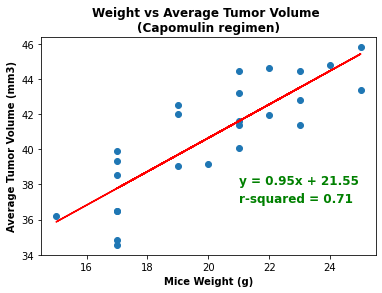

In [21]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_mice_weight, Capomulin_mice_t_vol)

regress_values = Capomulin_mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = round(rvalue**2,2)

plt.scatter(Capomulin_mice_weight,Capomulin_mice_t_vol)
plt.plot(Capomulin_mice_weight,regress_values,"r-")

plt.annotate(line_eq,(21,38), fontsize = 12, color = "green", fontweight = "bold")
plt.annotate(f"r-squared = {r_squared}", (21,37), fontsize = 12, color = "green", fontweight = "bold")

# print(f"The r-squared is {r_squared}")
      
plt.title("Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight = "bold")
plt.xlabel("Mice Weight (g)", fontweight = "bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight = "bold")

plt.savefig("Images/Linear regression model.png")
plt.show()